# Workbook

Use this notebook to complete the exercises throughout the workshop.

#### Table of Contents
- [Section 1 &ndash; Getting Started with Pandas](#Section-1)
- [Section 2 &ndash; Data Wrangling](#Section-2)
- [Section 3 &ndash; Data Visualization](#Section-3)

--- 

### Section 1

#### Exercise 1.1
##### Create a DataFrame by reading in the `2019_Yellow_Taxi_Trip_Data.csv` file. Examine the first 5 rows.

In [219]:
import pandas as pd
df = pd.read_csv('/Users/leofeingold/Documents/GitHub/pandas-workshop/data/2019_Yellow_Taxi_Trip_Data.csv')
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2,2019-10-23T16:39:42.000,2019-10-23T17:14:10.000,1,7.93,1,N,138,170,1,29.5,1.0,0.5,7.98,6.12,0.3,47.90,2.5
1,1,2019-10-23T16:32:08.000,2019-10-23T16:45:26.000,1,2.00,1,N,11,26,1,10.5,1.0,0.5,0.00,0.00,0.3,12.30,0.0
2,2,2019-10-23T16:08:44.000,2019-10-23T16:21:11.000,1,1.36,1,N,163,162,1,9.5,1.0,0.5,2.00,0.00,0.3,15.80,2.5
3,2,2019-10-23T16:22:44.000,2019-10-23T16:43:26.000,1,1.00,1,N,170,163,1,13.0,1.0,0.5,4.32,0.00,0.3,21.62,2.5
4,2,2019-10-23T16:45:11.000,2019-10-23T16:58:49.000,1,1.96,1,N,163,236,1,10.5,1.0,0.5,0.50,0.00,0.3,15.30,2.5


#### Exercise 1.2
##### Find the dimensions (number of rows and number of columns) in the data.

In [220]:
df.shape

(10000, 18)

#### Exercise 1.3
##### Using the data in the `2019_Yellow_Taxi_Trip_Data.csv` file, calculate summary statistics for the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` columns.

In [221]:
'''
#calculate the mean fare amount
mean_fare = df.fare_amount.mean()
print(f"Mean Fare: {mean_fare}")

#test to see if it is a good characteristic of the data using .quantile()
print(f"Quantiles: \n{df.fare_amount.quantile([0.01, .5, .6, .7, .75, .8, .9])}")

median_fare = df.fare_amount.median()
print(f"Median Fare: {median_fare}")


max_tip = df.tip_amount.max()
print(f"Max Tip: {max_tip}, \nMax Tip Trip Info: \n{df.loc[df.tip_amount.idxmax()]}")
'''

print(f"Fast Version: \n{df[['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']].describe()}")




Fast Version: 
        fare_amount    tip_amount  tolls_amount  total_amount
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      15.106313      2.634494      0.623447     22.564659
std       13.954762      3.409800      6.437507     19.209255
min      -52.000000      0.000000     -6.120000    -65.920000
25%        7.000000      0.000000      0.000000     12.375000
50%       10.000000      2.000000      0.000000     16.300000
75%       16.000000      3.250000      0.000000     22.880000
max      176.000000     43.000000    612.000000    671.800000


#### Exercise 1.4
##### Isolate the `fare_amount`, `tip_amount`, `tolls_amount`, and `total_amount` for the longest trip by distance (`trip_distance`).

In [222]:
df.loc[df.trip_distance.idxmax(), ["fare_amount", "tip_amount", "total_amount"]]

fare_amount      176.0
tip_amount       18.29
total_amount    201.21
Name: 8338, dtype: object

---

### Section 2

#### Exercise 2.1
##### Read in the meteorite data from the `Meteorite_Landings.csv` file, rename the `mass (g)` column to `mass`, and drop all the latitude and longitude columns. Sort the result by mass in descending order.

In [223]:
import pandas as pd

meteorite = pd.read_csv("/Users/leofeingold/Documents/GitHub/pandas-workshop/data/Meteorite_Landings.csv")
meteorite = meteorite.rename(columns = {'mass (g)': 'mass'})
columns_to_drop = {"reclat", "reclong"}
meteorite = meteorite.drop(columns = columns_to_drop)
meteorite = meteorite.sort_values('mass', ascending=False)
meteorite.head()


,name,id,nametype,recclass,mass,fall,year,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,"(47.0, 88.0)"


#### Exercise 2.2
##### Using the meteorite data from the `Meteorite_Landings.csv` file, update the `year` column to only contain the year, convert it to a numeric data type, and create a new column indicating whether the meteorite was observed falling before 1970. Set the index to the `id` column and extract all the rows with IDs between 10,036 and 10,040 (inclusive) with `loc[]`.

###### **Hint 1**: Use `year.str.slice()` to grab a substring.

###### **Hint 2**: Make sure to sort the index before using `loc[]` to select the range.

###### **Bonus**: There's a data entry error in the `year` column. Can you find it? (Don't spend too much time on this.)

In [224]:
import pandas as pd

meteorite1 = pd.read_csv("/Users/leofeingold/Documents/GitHub/pandas-workshop/data/Meteorite_Landings.csv").assign(
    year=lambda x: pd.to_numeric(x.year.str.slice(6, 10)),
    pre_1970 = lambda x: ((x.fall == "Fell") & (x.year < 1970))
).set_index('id')

meteorite1 = meteorite1.sort_index()
meteorite1.loc[10036:10040,:]


,name,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,pre_1970
id,,,,,,,,,,
10036,Enigma,Valid,H4,94.0,Found,1967.0,31.33333,-82.31667,"(31.33333, -82.31667)",False
10037,Enon,Valid,"Iron, ungrouped",763.0,Found,1883.0,39.86667,-83.95000,"(39.86667, -83.95)",False
10038,Enshi,Valid,H5,8000.0,Fell,1974.0,30.30000,109.50000,"(30.3, 109.5)",False
10039,Ensisheim,Valid,LL6,127000.0,Fell,1491.0,47.86667,7.35000,"(47.86667, 7.35)",True


#### Exercise 2.3
##### Using the meteorite data from the `Meteorite_Landings.csv` file, create a pivot table that shows both the number of meteorites and the 95th percentile of meteorite mass for those that were found versus observed falling per year from 2005 through 2009 (inclusive). Hint: Be sure to convert the `year` column to a number as we did in the previous exercise.

In [225]:
import pandas as pd

meteorite = pd.read_csv("/Users/leofeingold/Documents/GitHub/pandas-workshop/data/Meteorite_Landings.csv")
meteorite = meteorite.assign(
    year=lambda x: pd.to_numeric(x.year.str.slice(6, 10))
)

meteorite = meteorite.query('year.between(2005,2009)')
meteorite = meteorite.pivot_table(
    index = 'year',
    columns='fall',
    values='mass (g)',
    aggfunc = ['count', lambda x: x.quantile(0.95)]
)

meteorite = meteorite.rename(columns =  {"count": "Count", "<lambda>": "Ninety-Fifth Percentile Mass"})
meteorite.head()

Count         Ninety-Fifth Percentile Mass         
fall    Fell   Found                         Fell    Found
year                                                      
2005.0   NaN   874.0                          NaN  4500.00
2006.0   5.0  2450.0                      25008.0  1600.50
2007.0   8.0  1181.0                      89675.0  1126.90
2008.0   9.0   948.0                     106000.0  2274.80
2009.0   5.0  1492.0                       8333.4  1397.25

#### Exercise 2.4
##### Using the meteorite data from the `Meteorite_Landings.csv` file, compare summary statistics of the mass column for the meteorites that were found versus observed falling.

In [226]:
import pandas as pd

meteorite = pd.read_csv("/Users/leofeingold/Documents/GitHub/pandas-workshop/data/Meteorite_Landings.csv")

meteorite.groupby("fall")["mass (g)"].describe()

,count,mean,std,min,25%,50%,75%,max
fall,,,,,,,,
Fell,1075.0,47070.715023,717067.125826,0.1,686.00,2800.0,10450.0,23000000.0
Found,44510.0,12461.922983,571105.752311,0.0,6.94,30.5,178.0,60000000.0


#### Exercise 2.5
##### Using the taxi trip data in the `2019_Yellow_Taxi_Trip_Data.csv` file, resample the data to an hourly frequency based on the dropoff time. Calculate the total `trip_distance`, `fare_amount`, `tolls_amount`, and `tip_amount`, then find the 5 hours with the most tips.

In [229]:
import pandas as pd
df1 = pd.read_csv('/Users/leofeingold/Documents/GitHub/pandas-workshop/data/2019_Yellow_Taxi_Trip_Data.csv', parse_dates=True, index_col='tpep_pickup_datetime')

#df1 = pd.read_csv('/Users/leofeingold/Documents/GitHub/pandas-workshop/data/2019_Yellow_Taxi_Trip_Data.csv')

'''
df1.tpep_pickup_datetime = pd.to_datetime(df1.tpep_pickup_datetime)
df1.tpep_dropoff_datetime = pd.to_datetime(df1.tpep_dropoff_datetime)
df1.set_index('tpep_pickup_datetime', inplace=True)
'''

df1 = df1.resample('h')[['trip_distance', 'fare_amount','tolls_amount', 'tip_amount']]

df1 = df1.sum()

#df1.head()

df1.tip_amount.nlargest(5)





tpep_pickup_datetime
2019-10-23 16:00:00    23488.44
2019-10-23 17:00:00     2453.91
2019-10-23 15:00:00      339.60
2019-10-23 13:00:00       26.86
2019-10-23 14:00:00       16.66
Name: tip_amount, dtype: float64

--- 

### Section 3

#### Exercise 3.1
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create box plots for traveler throughput for each year in the data. Hint: Pass `kind='box'` into the `plot()` method to generate box plots.

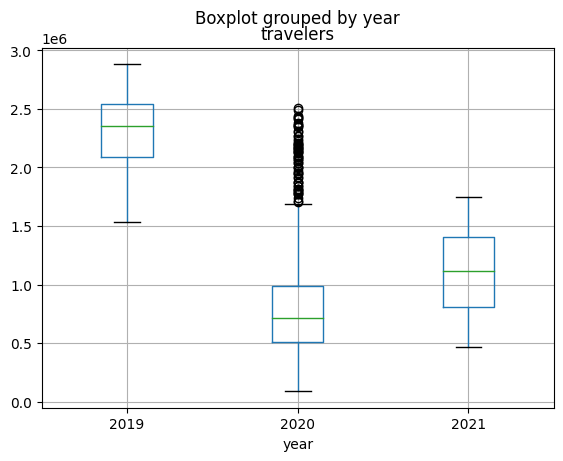

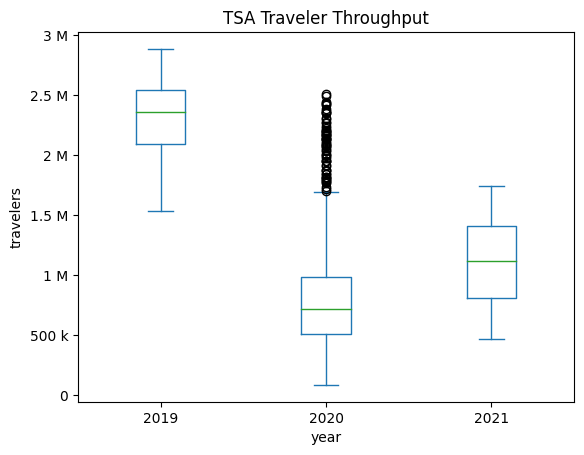

In [244]:
import pandas as pd
from matplotlib import ticker

df = pd.read_csv("/Users/leofeingold/Documents/GitHub/pandas-workshop/data/tsa_melted_holiday_travel.csv")
df.groupby('year').head()


df.boxplot(column = 'travelers', by = 'year')


df = pd.read_csv('../data/tsa_melted_holiday_travel.csv')
plot_data = df.pivot(columns='year', values='travelers')
ax = plot_data.plot(kind='box')
ax.set(xlabel='year', ylabel='travelers', title='TSA Traveler Throughput')
ax.yaxis.set_major_formatter(ticker.EngFormatter())

#### Exercise 3.2
##### Using the TSA traveler throughput data in the `tsa_melted_holiday_travel.csv` file, create a heatmap that shows the 2019 TSA median traveler throughput by day of week and month.

Text(0.5, 1.0, '2021 TSA Median Traveler Throughput\n(in millions)')

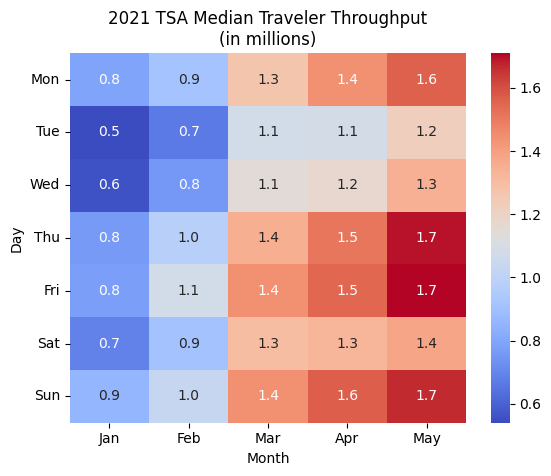

In [322]:
#import libraries
import calendar
import pandas as pd
from matplotlib.ticker import EngFormatter
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("/Users/leofeingold/Documents/GitHub/pandas-workshop/data/tsa_melted_holiday_travel.csv") #read in the data
df.set_index("year", inplace = True) #set the index to the year so that I can filter down the rows by year

testYear = 2021 #pick what year to display
df = df.loc[testYear] #filter the dataframe to the desired year
df["date"] = pd.to_datetime(df["date"]) #change the dates to pandas datetime objects, remember, this can be done when I first create the dataframe by including the parameter parse_dates and setting it to True
df = df.assign(
    Month = lambda x: x["date"].dt.month, #create the new month column and set it equal to the month (gathered from the date column)
    Day = lambda x: x["date"].dt.dayofweek #create the new day column and set it equal to the day (gathered from the date column)
)

df = df.pivot_table(values = "travelers", columns = "Month", index = "Day", aggfunc='median') #pivot the data so that you can create the heatmap

#day_dict = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"} #no longer needed because you can change the days to abbreviations when actually plotting the data
#df.index = df.index.map(day_dict) #see line above



ax = sns.heatmap(data= df / 1e6, annot=True, fmt='.1f', cmap='coolwarm') #create the Axes object
ax.set_xticklabels(calendar.month_abbr[1:df.shape[1] + 1]) #create the tickers and abbreviate the month -> notice the upper bound is df.shape[1] + 1 because there is only 5 month of 2021 data
ax.set_yticklabels(calendar.day_abbr, rotation=0) #set the y ticks (always 7 because 7 days in a week) and get the days abbreviated
ax.set_title(f'{testYear} TSA Median Traveler Throughput\n(in millions)') #set the title with a formatted string



#### Exercise 3.3
##### Annotate the medians in the box plot from *[Exercise 3.1](#Exercise-3.1)*. Hint: The `x` coordinates will be 1, 2, and 3 for 2019, 2020, and 2021, respectively. Alternatively, to avoid hardcoding values, you can use the `Axes.get_xticklabels()` method, in which case you should look at the [documentation](https://matplotlib.org/stable/api/text_api.html) for the `Text` class.